## Learning outcomes
- IOU

## Setup

In [1]:
!pip install requests

In [2]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

## IOU
FORMULA:

$$IOU = \frac{| A \cap B |}{| A \cup B |}$$

In [ ]:
def computeIOU(boxA, boxB):
    """boxA and boxB are of xyxy formats"""
    x_start = max(boxA[0], boxB[0])
    y_start = max(boxA[1], boxB[1])
    x_end = min(boxA[2], boxB[2])
    y_end = min(boxA[3], boxB[3])
    
    interArea = max(0, x_end - x_start + 1) * max(0, y_end - y_start + 1)
    
    areaA = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    areaB = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    
    return interArea / (areaA + areaB - interArea)

In [ ]:
img = cv.imread("images/lena.jfif")

In [ ]:
boxes = cv.selectROIs("bounding box", img, showCrosshair = False)

cv.waitKey(0)
cv.destroyAllWindows()

# drag a bounding box then hit spacebar
# drag another bounding box then hit spacebar again
# Press Esc twice to quit.

In [ ]:
boxes

In [ ]:
def convert_xywh_to_xyxy(box):
    return [box[0], box[1], box[0] + box[2], box[1] + box[3]]

In [ ]:
gt = convert_xywh_to_xyxy(boxes[0])
pred = convert_xywh_to_xyxy(boxes[1])

img_copy = img.copy()
cv.rectangle(img_copy, (gt[0], gt[1]), (gt[2],gt[3]), (0, 0, 255), 2)
cv.rectangle(img_copy, (pred[0], pred[1]), (pred[2],pred[3]), (255, 0, 0), 2)
cv.putText(img_copy, f"IOU: {computeIOU(gt, pred):.3f}",(10, 25),
          cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

show_img("IOU", img_copy)

## Edge detection
Sobel x operator kernel formulation:

$$\begin{bmatrix} 1 & 0 & 1\\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$$

In [9]:
img = cv.imread("images/wood_planck.jfif", 0)

th = cv.threshold(img, 200, 255, cv.THRESH_BINARY_INV)[1]

show_img("binary", th)
#sobel operators (wrong way)

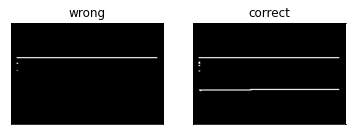

In [10]:
# wrong way
sobelx_8u = cv.Sobel(th, cv.CV_8U, 0, 1)

# correct way
sobelx_32f = cv.Sobel(th, cv.CV_32F, 0, 1)
sobelx = cv.convertScaleAbs(sobelx_32f)   # absolute and convert to uint8

plt.subplot(121), plt_img(sobelx_8u, "wrong")
plt.subplot(122), plt_img(sobelx, "correct")
plt.show()

### combine x and y edges

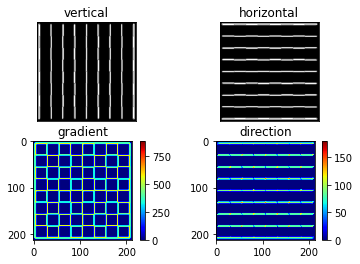

In [11]:
img = cv.imread("images/chessboard.png", 0)

# sobel x and y
sobelx_32f = cv.Sobel(img, cv.CV_32F, 1, 0)
sobelx = cv.convertScaleAbs(sobelx_32f)
sobely_32f = cv.Sobel(img, cv.CV_32F, 0, 1)
sobely = cv.convertScaleAbs(sobely_32f)

# gradient and direction
gradient = cv.magnitude(sobelx_32f, sobely_32f)
direction = cv.phase(sobelx_32f, sobely_32f, angleInDegrees=True) % 180

plt.subplot(221), plt_img(sobelx, "vertical")
plt.subplot(222), plt_img(sobely, "horizontal")
plt.subplot(223), plt.imshow(gradient, cmap="jet"), plt.title("gradient")
plt.colorbar()
plt.subplot(224), plt.imshow(direction, cmap="jet"), plt.title("direction")
plt.colorbar()
plt.show()

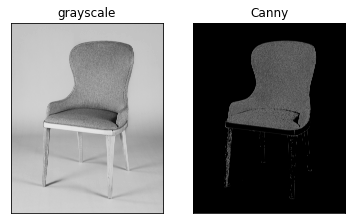

In [12]:
img = cv.imread("images/chair.jpg", 0)

edge = cv.Canny(img, 100, 300)

plt.subplot(121), plt_img(img, "grayscale")
plt.subplot(122), plt_img(edge, "Canny")

plt.show()

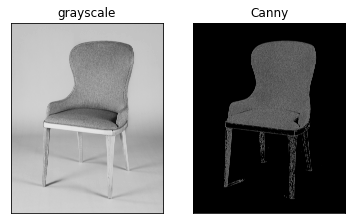

In [13]:
img = cv.imread("images/chair.jpg", 0)

edge = cv.Canny(img, 30, 150)

plt.subplot(121), plt_img(img, "grayscale")
plt.subplot(122), plt_img(edge, "Canny")

plt.show()

## Exercise
Create a trackbar that control the hysterisis thresholds and display the resulting images from the changes in the thresholds.

In [14]:
img = cv.imread("images/pineapple.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ratio = 2.5
trackbar_name = "Th1"
wn = "Canny"
ksize = 3

def cannyThreshold(val):
    """Trackbar callback function"""
    edge = cv.Canny(gray, val, ratio*val, apertureSize=ksize)
    mask = edge != 0
    res = img * (mask[:, :, None].astype(np.uint8))
    cv.imshow(wn, res)
    
cv.namedWindow(wn)
cv.createTrackbar(trackbar_name, wn, 10, 100, cannyThreshold)

cv.waitKey(0)
cv.destroyAllWindows()

In [15]:
def auto_canny(img, method, sigma=0.33):
    """Args:
    img: grayscale image
    method: median, otsu, triangle
    sigma:0.33 (default)"""
    if method == "median":
        Th = np.median(img)
    
    elif method == "otsu":
        Th = cv.threshold(img, 0, 255, cv.THRESH_OTSU)[0]
        
    elif method == "triangle":
        Th = cv.threshold(img, 0, 255, cv.THRESH_TRIANGLE)[0]
    
    else:
        raise Exception("Method specified unavailable")
    
    lowTh = (1-sigma) * Th
    highTh = (1+sigma) *Th
    
    return cv.Canny(img, lowTh, highTh)

## Contour detection

In [16]:
rect = np.zeros((256, 256), dtype=np.uint8)

cv.rectangle(rect, (25, 25), (231, 231), 255, -1)

show_img("rect", rect)

In [17]:
contours, _ = cv.findContours(rect, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

len(contours)

1

In [18]:
contours

(array([[[ 25,  25]],
 
        [[ 25, 231]],
 
        [[231, 231]],
 
        [[231,  25]]], dtype=int32),)

In [19]:
# load an image
img_bgr = cv.imread("images/monitor.jfif")
img = cv.imread("images/monitor.jfif", 0)

# threshold
th = cv.threshold(img, 200, 255, cv.THRESH_BINARY_INV)[1]

show_img("threshold", th)

contours, _ = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [20]:
len(contours)

12

In [21]:
cv.drawContours(img_bgr, contours, -1, (0, 255, 0), 1)

show_img("contours", img_bgr)

In [22]:
contours, _ = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

img_bgr_copy = img_bgr.copy()
cv.drawContours(img_bgr_copy, contours, -1, (0, 255, 0), 1)

show_img("contours", img_bgr_copy)

In [23]:
len(contours)

1

In [24]:
contours, _ = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [25]:
len(contours)

12

In [26]:
# contours with maximum number of points
length = [len(c) for c in contours]
contour_largest = contours[np.argmax(length)]

img_bgr_copy = img_bgr.copy()
cv.drawContours(img_bgr_copy, [contour_largest], -1, (0, 255, 0), 1)

show_img("contours", img_bgr_copy)

In [27]:
print(cv.__version__)

4.8.0


In [28]:
cnt = contour_largest

## Contour features

In [29]:
M = cv.moments(cnt)
print(M)

{'m00': 37113.5, 'm10': 3913689.5, 'm01': 3849569.1666666665, 'm20': 529272493.25, 'm11': 402572898.125, 'm02': 519454930.25, 'm30': 80631725758.65001, 'm21': 53484537787.45, 'm12': 53828827220.55, 'm03': 80175930424.35, 'mu20': 116566456.29821026, 'mu11': -3371527.140929699, 'mu02': 120161337.11136603, 'mu30': 234618732.78678894, 'mu21': -702775455.4171028, 'mu12': -249269762.75935364, 'mu03': 1368584318.4292145, 'nu20': 0.08462716040157804, 'nu11': -0.0024477261916909816, 'nu02': 0.08723704119285126, 'nu30': 0.0008841641534443626, 'nu21': -0.002648419664618219, 'nu12': -0.0009393767758931957, 'nu03': 0.005157530180767104}


In [30]:
# centroid (center of mass)
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])

print(f"the centroid of monitor: {(cx, cy)}")

the centroid of monitor: (105, 103)


In [31]:
# area and perimeter
area = cv.contourArea(cnt)
peri = cv.arcLength(cnt, True)

print(f"The area of monitor: {area}")
print(f"The perimeter of monitor: {peri:.3f}")

The area of monitor: 37113.5
The perimeter of monitor: 1056.777


In [32]:
img = cv.imread("images/remote-controller.webp")

show_img("img", img)

In [33]:
# resize -> grayscale -> bilateral filter -> edge detection -> find contour -> contour features
factor = 300 / img.shape[1]
img = cv.resize(img, None, fx=factor, fy=factor)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.bilateralFilter(gray, 7, 19, 13)
edge = auto_canny(blur, method="triangle")

show_img("edge", edge)

In [34]:
# fing contour
contours, _ = cv.findContours(edge, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# area
contours = sorted(contours, key=cv.contourArea, reverse=True)[:5]
screen = None
img_copy = img.copy()

for c in contours:
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.1*peri, True)
    
    if len(approx)==4:
        screen = c
        break

cv.drawContours(img_copy, [screen], -1, (0, 255, 0), 2)
show_img("screen", img_copy)

Circularity:

$$circularity = \frac{4 \times \pi \times Area}{Perimeter^2}$$

### Demo on red object detector

In [35]:
redLow1 = (0, 90, 40)
redHigh1 = (10, 255, 210)

redLow2 = (170, 90, 40)
redHigh2 = (179, 255, 210)

cap = cv.VideoCapture(0)

if not cap.isOpened():
    sys.exit("No webcam detected")
    
# factor
fixed_width = min_area = 500
factor = fixed_width / cap.get(3)  # frame width
kernel = np.ones((3, 3), dtype=np.uint8)

while (1):
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received")
        break
    
    # resize, blur, change to hsv, inRange, mask integration, morphological operation, find contour, bounding box
    resized = cv.resize(frame, None, fx=factor, fy=factor)
    blur = cv.GaussianBlur(resized, (5, 5), 0)
    img_hsv = cv.cvtColor(blur, cv.COLOR_BGR2HSV)
    
    mask1 = cv.inRange(img_hsv, redLow1, redHigh1)
    mask2 = cv.inRange(img_hsv, redLow2, redHigh2)
    mask = cv.add(mask1, mask2)
    # suppress noise
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel, iterations=2)
    
    # find contours
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    bbs = []
    centroids = []
    for c in contours:
        area = cv.contourArea(c)
        if area > min_area:
            bb = cv.boundingRect(c)
            M = cv.moments(c)
            cx, cy = int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"])
            centroids.append((cx, cy))
            bbs.append(bb)
            
    for bb, centroid in zip(bbs, centroids):
        x, y, w, h = bb
        cv.rectangle(resized, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv.circle(resized, centroid, 2, (255, 0, 0), -1)
        
    cv.imshow("red object", resized)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cv.destroyAllWindows()
cap.release()

## Weekly Activity
1. Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.
2. Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.
3. Isolate the clock with the aid of edge detection and contours' properties. The example result should be as follows:

In [62]:
#Question 1
img = cv.imread("images/pineapple.jfif", 0)

th = cv.threshold(img, 200, 255, cv.THRESH_BINARY_INV)[1]

sobelx_32f = cv.Sobel(th, cv.CV_32F, 1, 0, ksize=3)
sobely_32f = cv.Sobel(th, cv.CV_32F, 0, 1, ksize=3)
sobel = cv.magnitude(sobelx_32f, sobely_32f)

cv.imshow("Sobel", sobel)

cv.waitKey(0)
cv.destroyAllWindows()

In [49]:
laplacian = cv.Laplacian(img, cv.CV_32F, ksize=3)


cv.imshow("Laplacian", laplacian)

cv.waitKey(0)
cv.destroyAllWindows()

In [59]:
prewittx_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitty_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv.filter2D(img, cv.CV_32F, prewittx_kernel)
prewitt_y = cv.filter2D(img, cv.CV_32F, prewitty_kernel)
prewitt = cv.magnitude(prewitt_x, prewitt_y)

cv.imshow("Prewitt", prewitt)

cv.waitKey(0)
cv.destroyAllWindows()

In [60]:
scharrx = cv.Scharr(img, cv.CV_32F, 1, 0)
scharry = cv.Scharr(img, cv.CV_32F, 0, 1)
scharr = cv.magnitude(scharrx, scharry)

cv.imshow("Scharr", scharr)

cv.waitKey(0)
cv.destroyAllWindows()

In [61]:
canny = cv.Canny(img, 30, 100)

cv.imshow("Canny", canny)

cv.waitKey(0)
cv.destroyAllWindows()

In [63]:
# Sobel = only a little of edge is shown
# laplacian = All of the edge is highligeted but there is a lot of noise
# prewitt = The edge cannot be determine as a very big area is highlighted even if it is not edge
# scharr = exactly same result as prewitt
# canny = The edge that being shown is clear and is the most complete one among other operators.

In [165]:
#Question 2
img = cv.imread("images/electronic.jfif")

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

white_low = np.array([0, 0, 210])
white_high = np.array([255, 30, 255])

mask = cv.inRange(hsv, white_low, white_high)
contours, _ = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

img_copy = img.copy()

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(img_copy, (x, y), (x + w, y + h), (0, 0, 255), 2)

show_img("White Objects", img_copy)

In [188]:
#Question 3
img = cv.imread("images/clock.jpg")
img_copy = img.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (5, 5), 0)
edge = auto_canny(blur, method="triangle")

contours, _ = cv.findContours(edge, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

clock_contours = []

min = 0.5
max = 1.0

for contour in contours:
    area = cv.contourArea(contour)
    peri = cv.arcLength(contour, True)
    circularity = (4 * np.pi * area) / (peri ** 2)

    if min < circularity < max:
        clock_contours.append(contour)
        
for contour in clock_contours:
    (x, y), radius = cv.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv.circle(img_copy, center, radius, (0, 255, 0), 2)

show_img("Isolated Clock", img_copy)